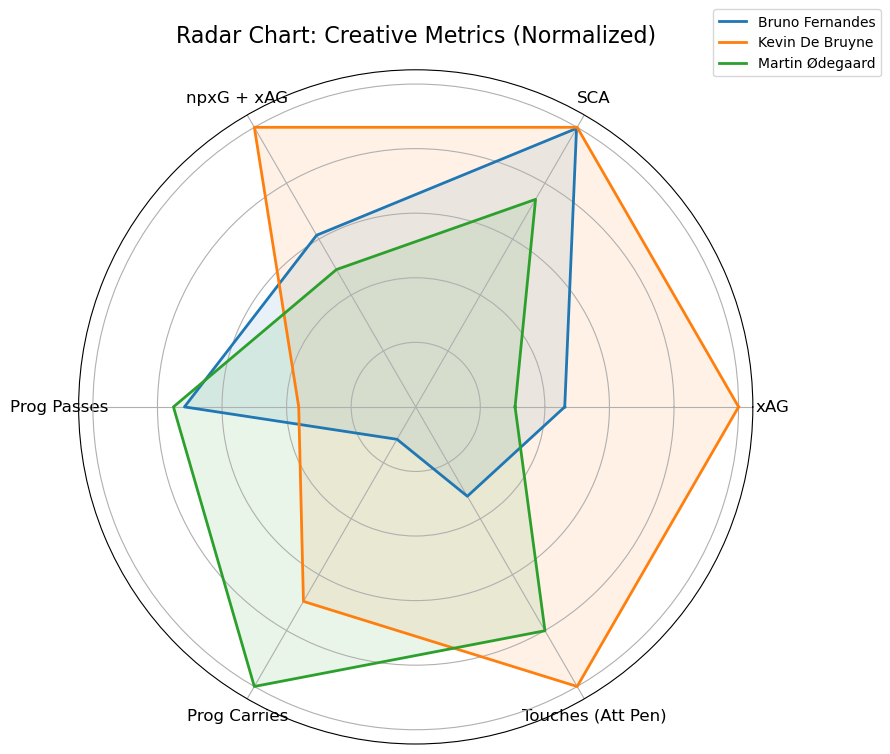

<Figure size 640x480 with 0 Axes>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
df = pd.read_csv("player_stats.csv", encoding='ISO-8859-1')
df.set_index("Player", inplace=True)

# Pick the metrics to compare
metrics = ['xAG', 'SCA', 'npxG + xAG', 'Prog Passes', 'Prog Carries', 'Touches (Att Pen)']
players = [
    'Bruno Fernandes',
    'Kevin De Bruyne',
    'Martin Ødegaard'
]

# Normalize the data
data_norm = df[metrics].copy()
for col in metrics:
    min_val = data_norm[col].min()
    max_val = data_norm[col].max()
    data_norm[col] = (data_norm[col] - min_val) / (max_val - min_val)

# Setup radar chart
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Initialize plot
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

# Plot each player
for player in players:
    values = data_norm.loc[player].tolist()
    values += values[:1]
    ax.plot(angles, values, label=player, linewidth=2)
    ax.fill(angles, values, alpha=0.1)

# Decorate the plot
ax.set_title("Radar Chart: Creative Metrics (Normalized)", size=16, pad=20)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels([])
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)

plt.tight_layout()
plt.show()

plt.savefig('visuals/attacking_radar.png')


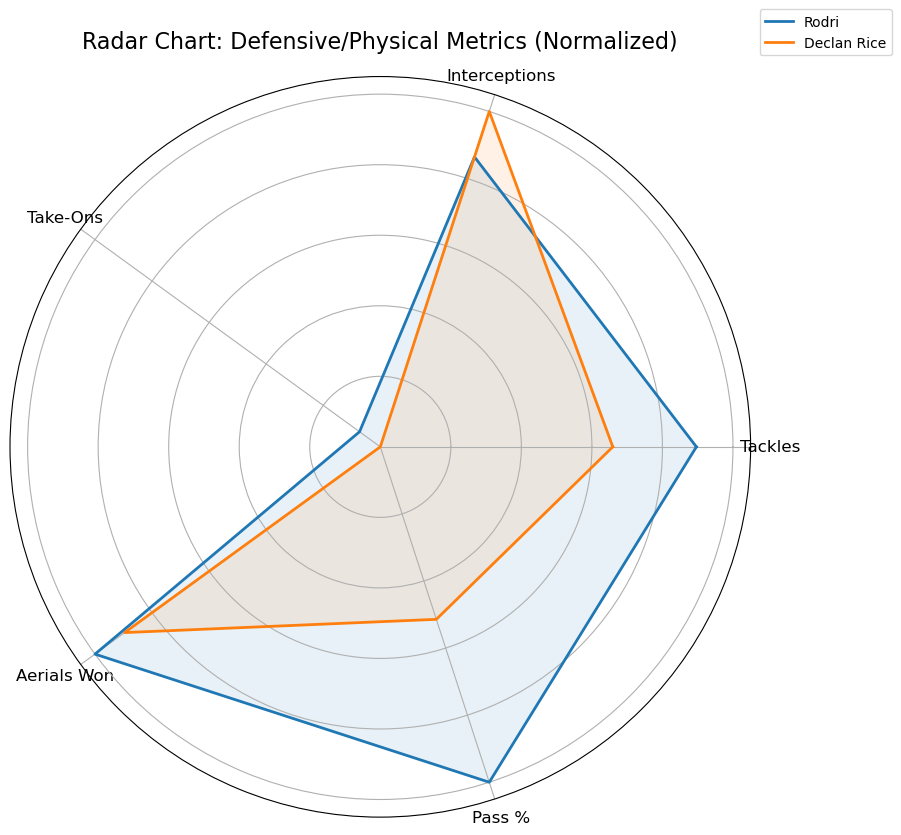

<Figure size 640x480 with 0 Axes>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("player_stats.csv", encoding='ISO-8859-1')
df.set_index("Player", inplace=True)

# Define defensive metrics
defensive_metrics = ['Tackles','Interceptions','Take-Ons','Aerials Won', 'Pass %']

# Players to compare
players = [
    'Rodri',
    'Declan Rice',
]

# Normalize metrics
data_norm = df[defensive_metrics].copy()
for col in defensive_metrics:
    min_val = data_norm[col].min()
    max_val = data_norm[col].max()
    data_norm[col] = (data_norm[col] - min_val) / (max_val - min_val)

# Setup radar chart
labels = defensive_metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]

# Radar chart plot
fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

for player in players:
    values = data_norm.loc[player].tolist()
    values += values[:1]
    ax.plot(angles, values, label=player, linewidth=2)
    ax.fill(angles, values, alpha=0.1)

# Final touches
ax.set_title("Radar Chart: Defensive/Physical Metrics (Normalized)", size=16, pad=20)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12)
ax.set_yticklabels([])
ax.grid(True)
ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1), fontsize=10)

plt.tight_layout()
plt.show()

plt.savefig('visuals/defensive_radar.png')
